## __POSTTEST 6__

#### Nama  : Deby Ayu Syakhira
#### NIM   : 2109106060
#### Kelas : Informatika B1 2021

***

### Link Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Membaca data dari file CSV heart_2020_cleaned

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
df = pd.read_csv('heart_2020_cleaned.csv')                       #membaca file CSV dengan nama 'heart_2020_cleaned.csv' dan disimpan di dalam variabel dataFrame
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Karena dataset terlalu besar, maka akan dilakukan pemangkasan dataset jadi menjadi 5000 baris secara acak

In [2]:
n = 5000
if len(df) > n:
    random_indices = np.random.choice(len(df), n, replace=False)
    df = df.iloc[random_indices]

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
209238,No,23.46,Yes,No,No,0.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
299020,No,31.01,No,No,No,0.0,3.0,No,Male,25-29,White,No,Yes,Very good,6.0,No,No,No
150333,No,31.25,No,No,No,15.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,Yes,No
298191,Yes,30.74,Yes,No,No,10.0,0.0,Yes,Male,70-74,American Indian/Alaskan Native,Yes,No,Poor,6.0,No,Yes,No
50302,No,53.14,Yes,Yes,No,0.0,0.0,Yes,Female,35-39,White,No,Yes,Fair,9.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274414,No,41.05,Yes,No,Yes,0.0,2.0,No,Male,70-74,White,No,Yes,Fair,10.0,No,No,Yes
97882,No,24.39,No,Yes,No,0.0,0.0,No,Male,55-59,White,No,Yes,Very good,7.0,No,No,No
299831,No,72.63,No,No,No,30.0,0.0,Yes,Female,45-49,White,Yes,No,Poor,5.0,No,Yes,No
194101,Yes,39.16,No,Yes,No,28.0,5.0,Yes,Male,55-59,White,No,No,Fair,10.0,No,No,No


 ## 1. __Membagi Dataset Menjadi Training Set dan Testing Set Dengan Proporsi 80:20__

In [3]:
X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
cNumerik = [col for col in X_train.columns if X_train[col].dtype != 'object']
cCatagorical = [col for col in X_train.columns if X_train[col].dtype == 'object']

 ## 2. __Proses preprocessing pada Dataset__

* __Melakukan Pengecekan nilai null pada dataset__

In [6]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

* __Melakukan Data cleaning pada data dengan nilai duplikat__

In [7]:
df.drop_duplicates(inplace =True) #menghapus data yang duplikat
df.duplicated().sum() #memeriksa jumlah data yang duplikat sudah terhapus atau belum

C:\Users\A514-54G-32GJ\AppData\Local\Temp\ipykernel_13500\1431061675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace =True) #menghapus data yang duplikat


0

* __Melakukan Label encoding dan One Hot Encoding pada dataset__

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [10]:
X_train_encoded = encoder.fit_transform(X_train[cCatagorical])
X_test_encoded = encoder.transform(X_test[cCatagorical])

In [12]:
X_train[cNumerik] = X_train[cNumerik].astype('float32')
X_test[cNumerik] = X_test[cNumerik].astype('float32')
y_train = (y_train == 'Yes').astype('float32')
y_test = (y_test == 'Yes').astype('float32') 

## 3. __Penerapan Sequential Model__

In [135]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#penerapan callback
es = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

#penerapan model Checkpoint
mc = ModelCheckpoint('best_model.h5', save_best_only=True)

#pelatihan model
history = model.fit(
    X_train_encoded, 
    y_train, 
    epochs=23, 
    batch_size=64, 
    validation_split=0.2, 
    callbacks=[es, mc]
)

Epoch 1/23
50/50 [==============================] - 1s 6ms/step - loss: 0.3353 - accuracy: 0.8928 - val_loss: 0.2683 - val_accuracy: 0.9100
Epoch 2/23
50/50 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9122 - val_loss: 0.2448 - val_accuracy: 0.9100
Epoch 3/23
50/50 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9128 - val_loss: 0.2389 - val_accuracy: 0.9150
Epoch 4/23
50/50 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9172 - val_loss: 0.2358 - val_accuracy: 0.9200
Epoch 5/23
50/50 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9178 - val_loss: 0.2409 - val_accuracy: 0.9175
Epoch 6/23
50/50 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9187 - val_loss: 0.2413 - val_accuracy: 0.9150
Epoch 7/23
50/50 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9187 - val_loss: 0.2401 - val_accuracy: 0.9187
Epoch 8/23
50/50 [==

In [138]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 64)                3008      
                                                                 
 dense_168 (Dense)           (None, 128)               8320      
                                                                 
 dense_169 (Dense)           (None, 64)                8256      
                                                                 
 dense_170 (Dense)           (None, 1)                 65        
                                                                 
Total params: 19649 (76.75 KB)
Trainable params: 19649 (76.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. __Melakukan Evaluasi Model Pada Dataset__

In [136]:
#evaluasi model pada data test
model.load_weights('best_model.h5')
test_loss, test_accuracy = model.evaluate(X_test_encoded, y_test, verbose=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9200
Test loss: 0.22659561038017273
Test accuracy: 0.9200000166893005


## 5. __Membuat Grafik Yang Menampilkan Pergerakan Metrik (Akurasi/Error) dan Loss Terhadap Epoch Baik Pada Training Maupun Validation__

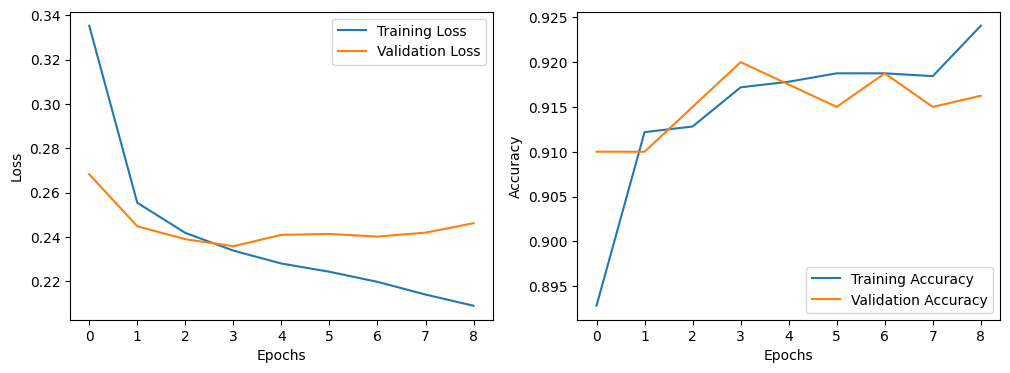

In [137]:
#membuat grafik dengan dua subplot untuk memvisualisasikan loss dan akurasi selama pelatihan model
plt.figure(figsize=(12, 4))

#subplot pertama untuk grafik loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')  #kurva loss pada data pelatihan
plt.plot(history.history['val_loss'], label='Validation Loss')  #kurva loss pada data validasi
plt.xlabel('Epochs')  #label sumbu X: jumlah epoch
plt.ylabel('Loss')  #label sumbu Y: loss
plt.legend() 

#subplot kedua untuk grafik akurasi
plt.subplot(1, 2, 2)
# Membuat grafik akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')  #kurva accuracy pada data pelatihan
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') #kurva accuracy pada data validasi
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#menampilkan grafik
plt.show()
